## 탐색적 자료 분석(EDA)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
train_data = pd.read_csv('data/train.csv', encoding = 'cp949')

In [3]:
train_data.shape

(5000, 18)

In [4]:
train_data.head()

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0      18       0   680100    15   45340      1.7        9    10       26.7   
1      21       0   353450     9   39272      1.2        6     8       11.1   
2      23       0  5671400    36  157539      2.8       22    16        5.6   
3      26       0  1964000    28   70143      1.4       15    14       39.3   
4      35       0   885000     5  177000      6.0        5     2        0.0   

   주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수 주구매코너  
0   100.0      NaN      9.0     6.0      NaN      NaN      6.0      9.0   화장품  
1    37.5      NaN      5.0     4.0      NaN      3.0      NaN      6.0  영캐주얼  
2    37.5      7.0     17.0    12.0      NaN     10.0     11.0     15.0   장신구  
3    28.6      5.0      8.0    15.0      NaN      NaN     18.0     10.0   화장품  
4   100.0      NaN      NaN     5.0      NaN      NaN      5.0      NaN   피혁A

In [5]:
# train 데이터의 null값 확인
train_data.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [6]:
# train 데이터의 null 값에 0 대입 / 구매건수의 null 값은 0일 것이다
train_data.fillna(0, inplace = True)
train_data.head()

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0      18       0   680100    15   45340      1.7        9    10       26.7   
1      21       0   353450     9   39272      1.2        6     8       11.1   
2      23       0  5671400    36  157539      2.8       22    16        5.6   
3      26       0  1964000    28   70143      1.4       15    14       39.3   
4      35       0   885000     5  177000      6.0        5     2        0.0   

   주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수 주구매코너  
0   100.0      0.0      9.0     6.0      0.0      0.0      6.0      9.0   화장품  
1    37.5      0.0      5.0     4.0      0.0      3.0      0.0      6.0  영캐주얼  
2    37.5      7.0     17.0    12.0      0.0     10.0     11.0     15.0   장신구  
3    28.6      5.0      8.0    15.0      0.0      0.0     18.0     10.0   화장품  
4   100.0      0.0      0.0     5.0      0.0      0.0      5.0      0.0   피혁A

In [7]:
# train 데이터의 null값 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


## 변수의 특성 분석

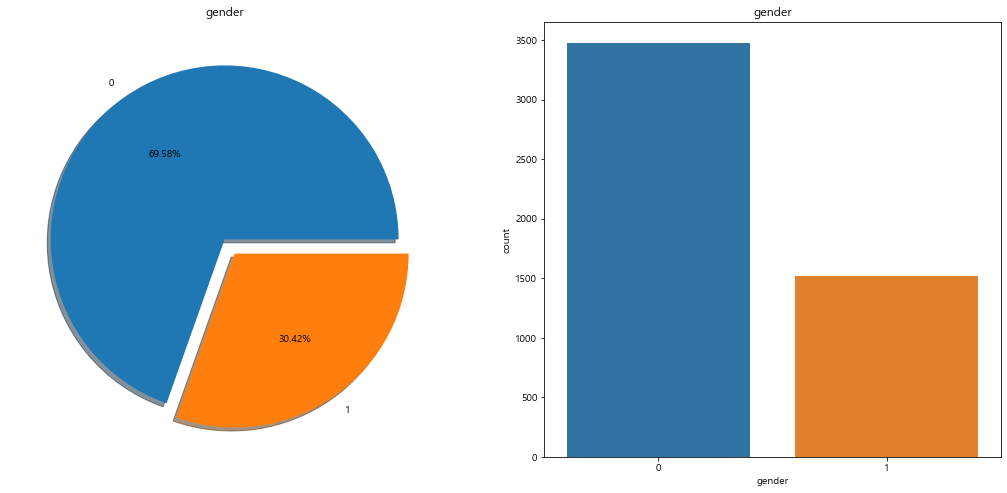

In [8]:
# 우리가 구하고자 하는 gender의 비율이 train_data에서는 약 7:3 비율로 나타난다.
# 그렇기 때문에 데이터의 값이 한쪽으로 치우쳐져 있는 비대칭 데이터이다.
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['gender'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0], shadow=True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender', data = train_data, ax=ax[1])
ax[1].set_title('gender')
plt.show()

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


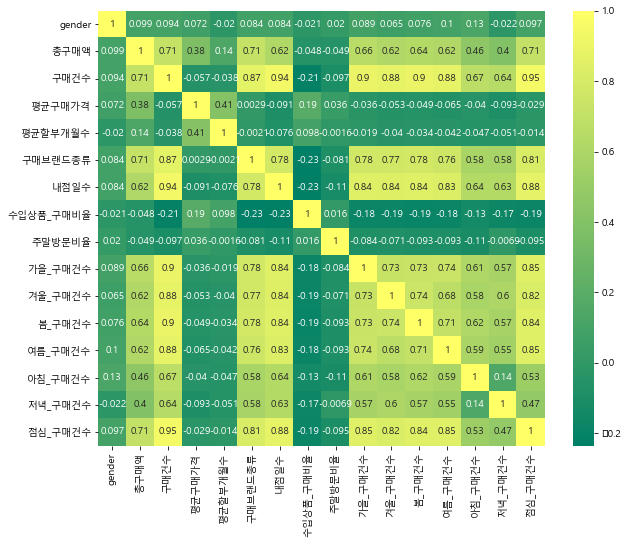

In [9]:
# 데이터의 변수값들의 상관관계 분석
# custid는 우리가 구하고자하는 gender 값과는 전혀 상관이 없으므로 상관관계 분석에서 빼줌
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(train_data.loc[:,'gender':].corr(), annot = True, fmt = '.2g', cmap = 'summer')
# gender 값의 가장 적은 상관관계를 보여주는 변수는 평균할부개월수, 수입상품 구매비율, 저녁 구매건수, 주구매코너이다.

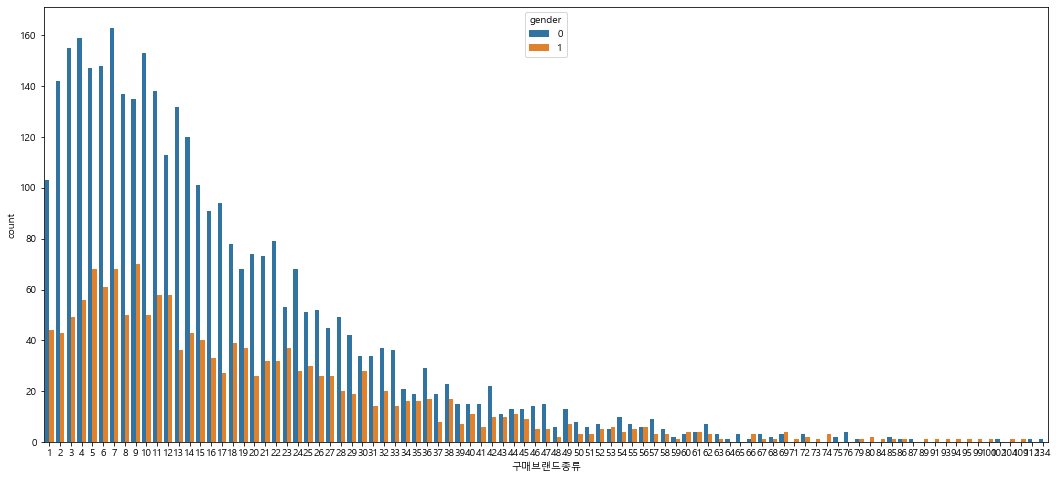

In [10]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('구매브랜드종류',hue='gender',data=train_data)
plt.show()

# 구매 브랜드 종류에 따른 gender 분류는 데이터의 양 차이도 있지만 브랜드 종류에 따른 gender 값의 변화가 크게 상관 없음을 알 수 있다.

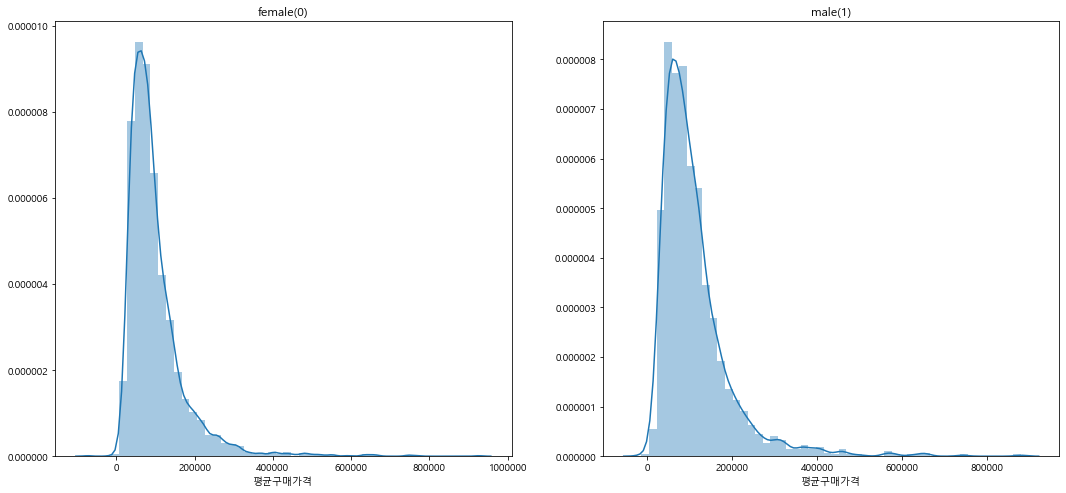

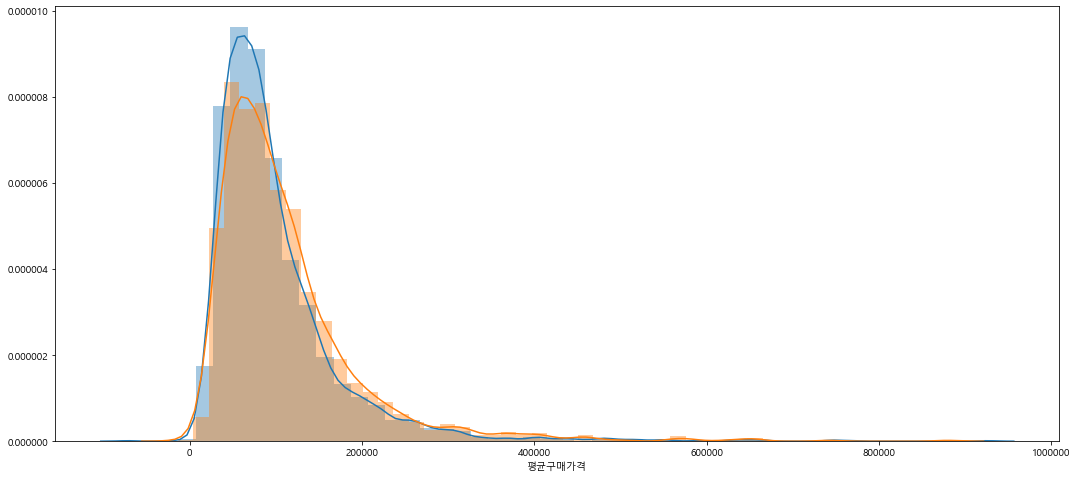

In [11]:
# 평균구매가격은 총구매액을 구매건수로 나눈것으로 두개의 변수를 포함한다고 볼 수 있다.
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].평균구매가격,ax=ax[0])
ax[0].set_title('female(0)')
sns.distplot(train_data[train_data['gender']==1].평균구매가격,ax=ax[1])
ax[1].set_title('male(1)')

f,ax=plt.subplots(1,1,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].평균구매가격)
#ax[0].set_title('female(0)')
sns.distplot(train_data[train_data['gender']==1].평균구매가격)
#ax[1].set_title('male(1)')

plt.show()
# 평균구매가격을 기준으로 남녀를 데이터 시각화 시켰을 때 중간값은 여자의 비율일 훨씬 높고,
# 구매가격이 증가할 수록 남자의 비율이 조금 더 높아지는 것을 알 수 있다.

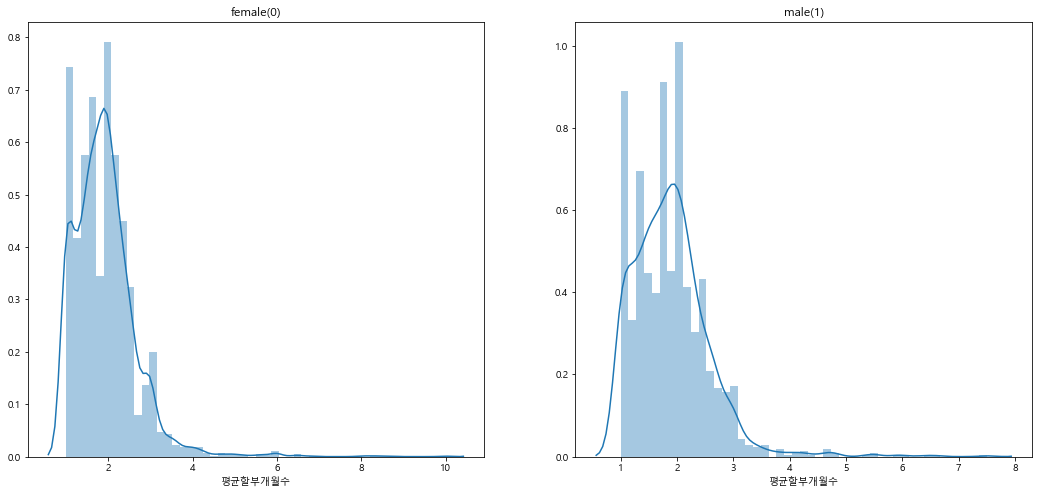

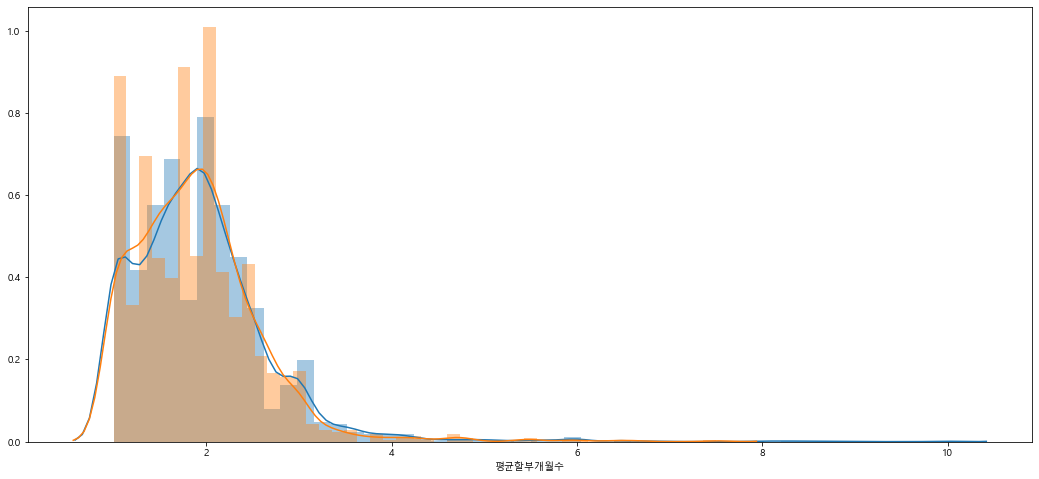

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].평균할부개월수,ax=ax[0])
ax[0].set_title('female(0)')
sns.distplot(train_data[train_data['gender']==1].평균할부개월수,ax=ax[1])
ax[1].set_title('male(1)')

f,ax=plt.subplots(1,1,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].평균할부개월수)
#ax[0].set_title('female(0)')
sns.distplot(train_data[train_data['gender']==1].평균할부개월수)
#ax[1].set_title('male(1)')

plt.show()

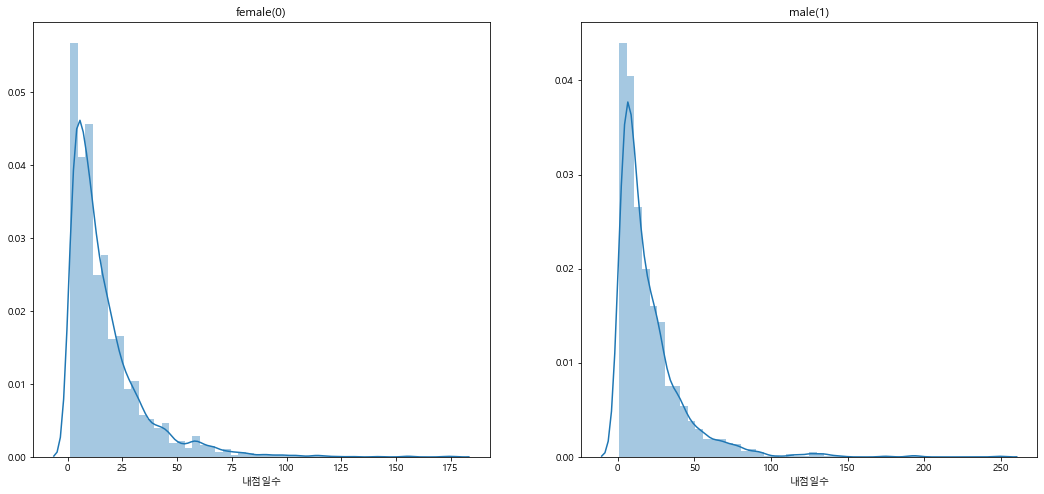

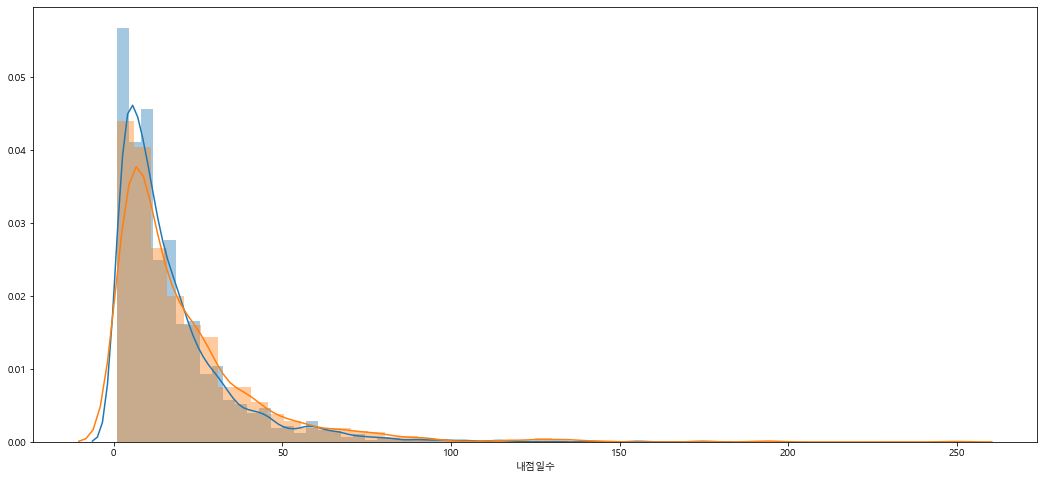

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].내점일수,ax=ax[0])
ax[0].set_title('female(0)')
sns.distplot(train_data[train_data['gender']==1].내점일수,ax=ax[1])
ax[1].set_title('male(1)')

f,ax=plt.subplots(1,1,figsize=(18,8))
sns.distplot(train_data[train_data['gender']==0].내점일수)
sns.distplot(train_data[train_data['gender']==1].내점일수)

plt.show()

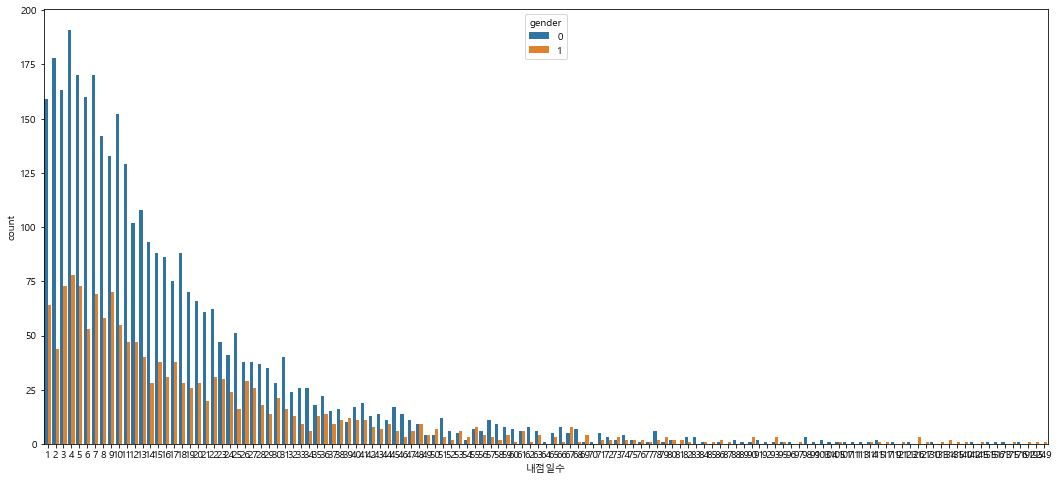

In [14]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('내점일수',hue='gender',data=train_data)
plt.show()

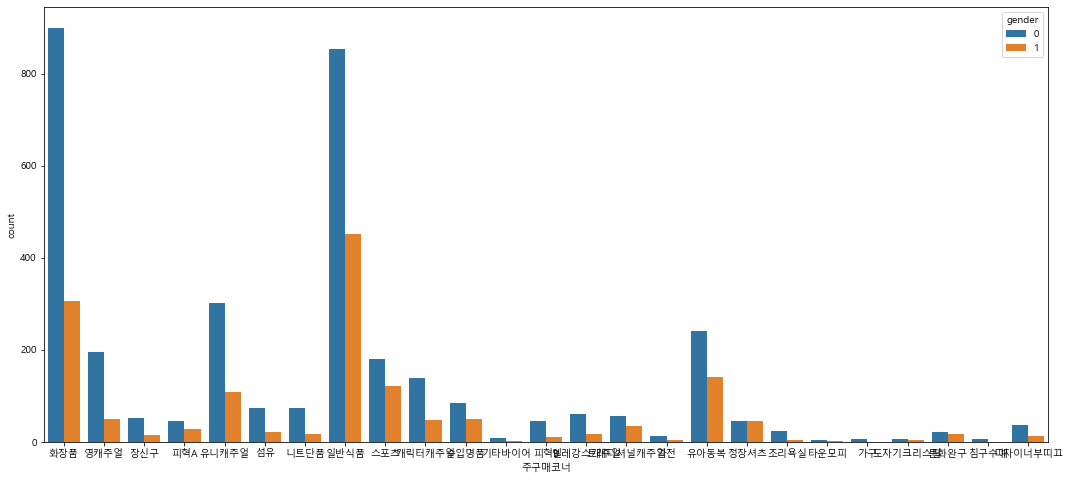

In [15]:
f,ax=plt.subplots(1,1,figsize=(18,8))
sns.countplot('주구매코너',hue='gender',data=train_data)
plt.show()

# Features engineering

## 파생 변수1
- 평균구매가격을 기준으로 고객등급을 나누어봄

In [16]:
train_data['고객등급'] = train_data['평균구매가격'].apply(lambda x: 5 if x < train_data['평균구매가격'].quantile(0.20)
                                              else 4 if train_data['평균구매가격'].quantile(0.20) < x < train_data['평균구매가격'].quantile(0.40)
                                              else 3 if train_data['평균구매가격'].quantile(0.40) < x < train_data['평균구매가격'].quantile(0.60)
                                              else 2 if train_data['평균구매가격'].quantile(0.60) < x < train_data['평균구매가격'].quantile(0.80)
                                              else 1)
train_data

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
0         18       0   680100    15   45340      1.7        9    10   
1         21       0   353450     9   39272      1.2        6     8   
2         23       0  5671400    36  157539      2.8       22    16   
3         26       0  1964000    28   70143      1.4       15    14   
4         35       0   885000     5  177000      6.0        5     2   
...      ...     ...      ...   ...     ...      ...      ...   ...   
4995   49952       1  6666517    93   71683      1.8       27    39   
4996   49954       0  3112100    17  183065      3.6       10    13   
4997   49957       1  5852482    37  158175      2.6       14    21   
4998   49975       1   654498    13   50346      2.5       10     7   
4999   49993       1  2554723    32   79835      1.7        9    26   

      수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
0          26.7   100.0      0.0      9.0     6.0      0.0      0.0      6.0   
1          11.1    37.5      0.0      5.0     4.0      0.0      3.0      0.0   
2           5.6    37.5      7.0     17.0    12.0      0.0     10.0     11.0   
3          39.3    28.6      5.0      8.0    15.0      0.0      0.0     18.0   
4           0.0   100.0      0.0      0.0     5.0      0.0      0.0      5.0   
...         ...     ...      ...      ...     ...      ...      ...      ...   
4995       10.8    43.6     13.0     33.0    14.0     33.0      8.0     41.0   
4996       29.4    38.5      4.0      6.0     6.0      1.0      3.0      0.0   
4997       40.5    19.0     12.0      6.0     6.0     13.0     16.0      0.0   
4998        7.7    14.3      6.0      4.0     2.0      1.0      0.0      2.0   
4999       21.9    34.6      6.0      5.0    10.0     11.0      8.0      5.0   

      점심_구매건수    주구매코너  고객등급  
0         9.0      화장품     5  
1         6.0     영캐주얼     5  
2        15.0      장신구     1  
3        10.0      화장품     4  
4         0.0      피혁A     1  
...       ...      ...   ...  
4995     44.0     일반식품     3  
4996     14.0  디자이너부띠끄     1  
4997     21.0      화장품     1  
4998     11.0      피혁A     4  
4999     19.0     일반식품     3  

[5000 rows x 19 columns]

## 파생변수 2
- 주구매코너를 기준으로 각 코너의 여성비율을 만듬

In [17]:
train_data['주구매코너'].value_counts()

일반식품        1306
화장품         1206
유니캐주얼        410
유아동복         383
스포츠          301
영캐주얼         246
캐릭터캐주얼       188
수입명품         136
섬유            96
니트단품          91
트래디셔널캐주얼      91
정장셔츠          90
엘레강스캐주얼       78
피혁A           75
장신구           68
피혁B           56
디자이너부띠끄       51
문화완구          38
조리욕실          28
가전            18
기타바이어         12
도자기크리스탈       11
침구수예           8
가구             7
타운모피           6
Name: 주구매코너, dtype: int64

In [18]:
train_data[['gender', '주구매코너']]

gender    주구매코너
0          0      화장품
1          0     영캐주얼
2          0      장신구
3          0      화장품
4          0      피혁A
...      ...      ...
4995       1     일반식품
4996       0  디자이너부띠끄
4997       1      화장품
4998       1      피혁A
4999       1     일반식품

[5000 rows x 2 columns]

In [19]:
df2 = train_data.groupby(['주구매코너'])['gender'].agg(['count','sum'])
df2['주구매코너여성수'] = df2['count']- df2['sum']
df2['주구매코너별여성비율'] = ((df2['count']- df2['sum'])/df2['count'])
df2

count  sum  주구매코너여성수  주구매코너별여성비율
주구매코너                                     
가구            7    1         6    0.857143
가전           18    5        13    0.722222
기타바이어        12    3         9    0.750000
니트단품         91   17        74    0.813187
도자기크리스탈      11    5         6    0.545455
디자이너부띠끄      51   13        38    0.745098
문화완구         38   17        21    0.552632
섬유           96   21        75    0.781250
수입명품        136   51        85    0.625000
스포츠         301  121       180    0.598007
엘레강스캐주얼      78   18        60    0.769231
영캐주얼        246   50       196    0.796748
유니캐주얼       410  109       301    0.734146
유아동복        383  142       241    0.629243
일반식품       1306  452       854    0.653905
장신구          68   16        52    0.764706
정장셔츠         90   45        45    0.500000
조리욕실         28    4        24    0.857143
침구수예          8    1         7    0.875000
캐릭터캐주얼      188   48       140    0.744681
타운모피          6    2         4    0.666667
트래디셔널캐주얼     91   34        57    0.626374
피혁A          75   29        46    0.613333
피혁B          56   10        46    0.821429
화장품        1206  307       899    0.745439

In [20]:
train_data['주구매코너별여성비율'] = train_data['주구매코너'].apply(lambda x: 0.745439 if x == '화장품'
                            else 0.821429 if x == '피혁B'
                            else 0.613333 if x == '피혁A'
                            else 0.626374 if x == '트래디셔널캐주얼'
                            else 0.666667 if x == '타운모피'
                            else 0.744681 if x == '캐릭터캐주얼'
                            else 0.875000 if x == '침구수예'
                            else 0.857143 if x == '조리욕실'
                            else 0.500000 if x == '정장셔츠'
                            else 0.764706 if x == '장신구'
                            else 0.653905 if x == '일반식품'
                            else 0.629243 if x == '유아동복'
                            else 0.734146 if x == '유니캐주얼'
                            else 0.796748 if x == '영캐주얼'
                            else 0.769231 if x == '엘레강스캐주얼'
                            else 0.598007 if x == '스포츠'
                            else 0.625000 if x == '수입명품'
                            else 0.781250 if x == '섬유'
                            else 0.552632 if x == '문화완구'
                            else 0.745098 if x == '디자이너부띠끄'
                            else 0.545455 if x == '도자기크리스탈'
                            else 0.813187 if x == '니트단품'
                            else 0.750000 if x == '기타바이어'
                            else 0.722222 if x == '가전'
                            else 0.857143)
train_data

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  \
0         18       0   680100    15   45340      1.7        9    10   
1         21       0   353450     9   39272      1.2        6     8   
2         23       0  5671400    36  157539      2.8       22    16   
3         26       0  1964000    28   70143      1.4       15    14   
4         35       0   885000     5  177000      6.0        5     2   
...      ...     ...      ...   ...     ...      ...      ...   ...   
4995   49952       1  6666517    93   71683      1.8       27    39   
4996   49954       0  3112100    17  183065      3.6       10    13   
4997   49957       1  5852482    37  158175      2.6       14    21   
4998   49975       1   654498    13   50346      2.5       10     7   
4999   49993       1  2554723    32   79835      1.7        9    26   

      수입상품_구매비율  주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  \
0          26.7   100.0      0.0      9.0     6.0      0.0      0.0      6.0   
1          11.1    37.5      0.0      5.0     4.0      0.0      3.0      0.0   
2           5.6    37.5      7.0     17.0    12.0      0.0     10.0     11.0   
3          39.3    28.6      5.0      8.0    15.0      0.0      0.0     18.0   
4           0.0   100.0      0.0      0.0     5.0      0.0      0.0      5.0   
...         ...     ...      ...      ...     ...      ...      ...      ...   
4995       10.8    43.6     13.0     33.0    14.0     33.0      8.0     41.0   
4996       29.4    38.5      4.0      6.0     6.0      1.0      3.0      0.0   
4997       40.5    19.0     12.0      6.0     6.0     13.0     16.0      0.0   
4998        7.7    14.3      6.0      4.0     2.0      1.0      0.0      2.0   
4999       21.9    34.6      6.0      5.0    10.0     11.0      8.0      5.0   

      점심_구매건수    주구매코너  고객등급  주구매코너별여성비율  
0         9.0      화장품     5    0.745439  
1         6.0     영캐주얼     5    0.796748  
2        15.0      장신구     1    0.764706  
3        10.0      화장품     4    0.745439  
4         0.0      피혁A     1    0.613333  
...       ...      ...   ...         ...  
4995     44.0     일반식품     3    0.653905  
4996     14.0  디자이너부띠끄     1    0.745098  
4997     21.0      화장품     1    0.745439  
4998     11.0      피혁A     4    0.613333  
4999     19.0     일반식품     3    0.653905  

[5000 rows x 20 columns]

In [21]:
train_data['주구매코너별여성비율등급'] = train_data['주구매코너별여성비율'].apply(lambda x: 5 if x < train_data['주구매코너별여성비율'].quantile(0.20)
                                              else 4 if train_data['주구매코너별여성비율'].quantile(0.20) < x < train_data['주구매코너별여성비율'].quantile(0.40)
                                              else 3 if train_data['주구매코너별여성비율'].quantile(0.40) < x < train_data['주구매코너별여성비율'].quantile(0.60)
                                              else 2 if train_data['주구매코너별여성비율'].quantile(0.60) < x < train_data['주구매코너별여성비율'].quantile(0.80)
                                              else 1)
train_data.head()

custid  gender     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0      18       0   680100    15   45340      1.7        9    10       26.7   
1      21       0   353450     9   39272      1.2        6     8       11.1   
2      23       0  5671400    36  157539      2.8       22    16        5.6   
3      26       0  1964000    28   70143      1.4       15    14       39.3   
4      35       0   885000     5  177000      6.0        5     2        0.0   

   주말방문비율  ...  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  주구매코너  \
0   100.0  ...      9.0     6.0      0.0      0.0      6.0      9.0    화장품   
1    37.5  ...      5.0     4.0      0.0      3.0      0.0      6.0   영캐주얼   
2    37.5  ...     17.0    12.0      0.0     10.0     11.0     15.0    장신구   
3    28.6  ...      8.0    15.0      0.0      0.0     18.0     10.0    화장품   
4   100.0  ...      0.0     5.0      0.0      0.0      5.0      0.0    피혁A   

  고객등급  주구매코너별여성비율  주구매코너별여성비율등급  
0    5    0.745439             1  
1    5    0.796748             1  
2    1    0.764706             1  
3    4    0.745439             1  
4    1    0.613333             5  

[5 rows x 21 columns]

In [22]:
# 주구매코너의 value 값은 str데이터 형식이므로 예측에 포함될 수 없는 데이터이다
# 그렇기 때문에 각 value 값을 category화 시켜서 숫자로 바꿔준다.
obj=['주구매코너']
train_data['주구매코너'].astype('category').cat.categories
train_data[obj] = train_data[obj].apply(lambda x: x.astype('category').cat.codes)
train_data.dtypes

custid            int64
gender            int64
총구매액              int64
구매건수              int64
평균구매가격            int64
평균할부개월수         float64
구매브랜드종류           int64
내점일수              int64
수입상품_구매비율       float64
주말방문비율          float64
가을_구매건수         float64
겨울_구매건수         float64
봄_구매건수          float64
여름_구매건수         float64
아침_구매건수         float64
저녁_구매건수         float64
점심_구매건수         float64
주구매코너              int8
고객등급              int64
주구매코너별여성비율      float64
주구매코너별여성비율등급      int64
dtype: object

# Modeling

## 데이터의 남녀의 비율이 비대칭 데이터이므로 데이터 샘플링을 통하여 비율을 조정함

In [29]:
dfX = train_data.drop(['custid','gender'], axis=1)
dfy = train_data['gender']

In [30]:
train_data['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [31]:
from imblearn.combine import *
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [33]:
# 남녀 비율을 조정하지 않고 DecisionTree 알고리즘을 돌려보았을 때
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       883
           1       0.39      0.08      0.13       367

    accuracy                           0.69      1250
   macro avg       0.55      0.51      0.47      1250
weighted avg       0.62      0.69      0.61      1250



### TomekLinks

In [34]:
from imblearn.under_sampling import TomekLinks

In [35]:
# Tomek links: a under-sampling class method
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)

print(classification_report(y_test, y_pred0))
# Under-Sampling 기법은 precision/recall/f1-score 개선이 미미함

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       883
           1       0.38      0.09      0.14       367

    accuracy                           0.69      1250
   macro avg       0.55      0.51      0.48      1250
weighted avg       0.62      0.69      0.61      1250



### SMOTETomek

In [36]:
from imblearn.combine import SMOTETomek

In [37]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))
# SMOTETomek을 사용하였을 때 가장 균형있게 샘플링 되므로 SMOTETomek 사용

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       883
           1       0.34      0.39      0.36       367

    accuracy                           0.60      1250
   macro avg       0.54      0.54      0.54      1250
weighted avg       0.62      0.60      0.61      1250



## 데이터 선택

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


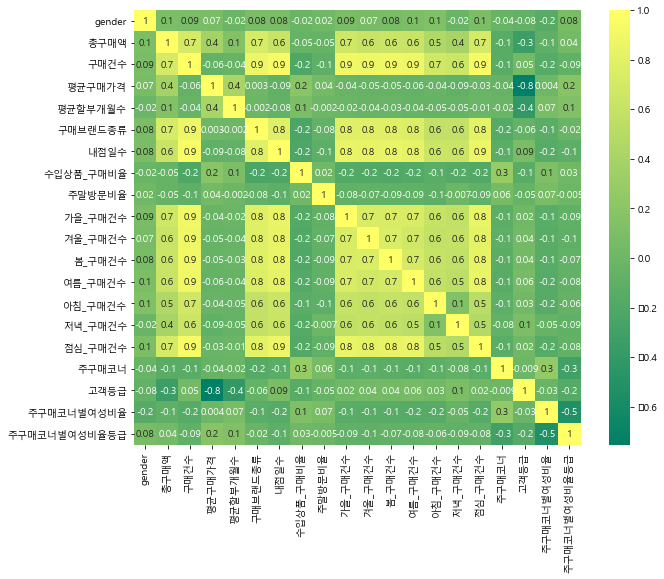

In [38]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(train_data.loc[:,'gender':].corr(), annot = True, fmt = '.1g', cmap = 'summer')
# 파생변수를 포함하여 상관관계를 분석하였을 때 유효하지 gender 값에 유효하지 못한 변수들을 제거하였다.

In [39]:
del_col = ['수입상품_구매비율', '평균할부개월수', '저녁_구매건수', '주구매코너', '고객등급', '주구매코너별여성비율']
train_data_1 = train_data.drop(del_col, axis = 1)
train_data_1.head()

custid  gender     총구매액  구매건수  평균구매가격  구매브랜드종류  내점일수  주말방문비율  가을_구매건수  \
0      18       0   680100    15   45340        9    10   100.0      0.0   
1      21       0   353450     9   39272        6     8    37.5      0.0   
2      23       0  5671400    36  157539       22    16    37.5      7.0   
3      26       0  1964000    28   70143       15    14    28.6      5.0   
4      35       0   885000     5  177000        5     2   100.0      0.0   

   겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  점심_구매건수  주구매코너별여성비율등급  
0      9.0     6.0      0.0      0.0      9.0             1  
1      5.0     4.0      0.0      3.0      6.0             1  
2     17.0    12.0      0.0     10.0     15.0             1  
3      8.0    15.0      0.0      0.0     10.0             1  
4      0.0     5.0      0.0      0.0      0.0             5

In [40]:
dfX = train_data_1.drop(['custid','gender'], axis=1)
dfy = train_data_1['gender']

In [41]:
# SMOTETomek을 사용하여 샘플링한 데이터로 데이터 스플릿을 해줌
X_resampled, y_resampled = SMOTETomek(random_state=0).fit_sample(dfX, dfy)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)
print(dfX.shape, X_resampled.shape, X_train.shape, X_test.shape)

(5000, 13) (5878, 13) (4408, 13) (1470, 13)


## 예측해보기

### Voting ensemble

In [42]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

In [44]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(random_state=0, probability=True)
mlp = MLPClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn), ('svm', svm), ('mlp', mlp)],
    voting = 'hard')

In [46]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, svm, mlp, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.5197278911564626
DecisionTreeClassifier 0.6965986394557823
KNeighborsClassifier 0.6687074829931973
SVC 0.5680272108843537


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier 0.482312925170068


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier 0.6523809523809524


In [40]:
# 보팅 앙상블을 이용하여 hard 방법을 사용하였을 때 0.65의 예측율을 얻을 수 있다.

### Averaging predictions

In [47]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn), ('svm', svm), ('mlp', mlp)],
    voting = 'soft')
averaging.fit(X_train, y_train)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [48]:
averaging.fit(X_train, y_train).score(X_test, y_test)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7095238095238096

In [43]:
# 보팅 앙상블을 soft 방식을 사용하였을 때 0.71의 예측율을 얻을 수 있다.

### Stacking

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(random_state=0, probability=True)
mlp = MLPClassifier(alpha=1)

In [45]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[logreg, tree, knn, svm, mlp], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (logreg, tree, knn, svm, mlp, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

LogisticRegression 0.5197278911564626
DecisionTreeClassifier 0.6945578231292517
KNeighborsClassifier 0.6687074829931973
SVC 0.5680272108843537


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier 0.4816326530612245


C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


StackingClassifier 0.7027210884353742


In [46]:
# 스택킹을 사용하였을 때 0.70의 예측율을 얻을 수 있다.

### Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.6741496598639456

In [48]:
# 배깅 방식을 사용하였을 때 0.67의 예측율을 얻을 수 있다.

### AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.7387755102040816

In [50]:
# 아다 부스트 방식을 사용하였을 때 0.73의 예측율을 얻을 수 있다.

### Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.7653061224489796

In [52]:
# 그라디언트 부스팅을 사용하였을 때 0.76의 예측율을 얻을 수 있다.

### 예측률 시각화

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

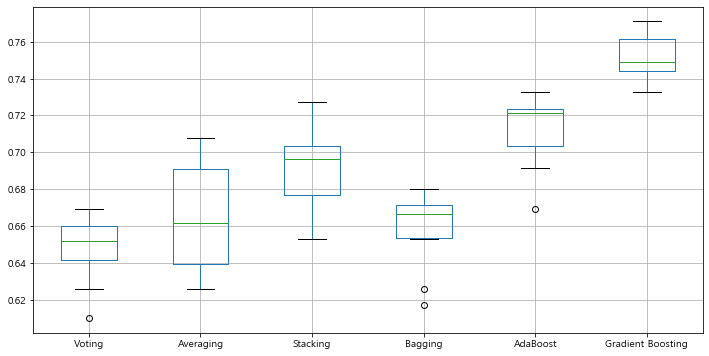

In [53]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
accuracy = []
std = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

## XGboost

In [51]:
from xgboost import XGBClassifier
from xgboost import plot_importance

import xgboost as xgb

In [52]:
xgb = XGBClassifier()
xgb

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)

In [53]:
xgb.fit(X_train, y_train).score(X_test, y_test)

0.7884353741496599

### 크로스 벨리데이션

In [55]:
model = xgb

from sklearn.model_selection import cross_val_score
# k를 조정하여 다섯번(cv=5) 돌려본다.
scores = cross_val_score(model, X_train, y_train, cv=5); scores

array([0.75170068, 0.76417234, 0.75510204, 0.74914869, 0.74687855])

In [56]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.753
Std: 0.006
Min: 0.747
Max: 0.764


In [ ]:
# 크로스 벨리데이션을 통하여 가장 예측율이 좋았던 xgb를 돌려보았을 때 분산이 0.006로 신뢰성이 높은 것을 알 수 있다.

In [57]:
# cv=LeaveOneOut으로 데이터 수만큼 크로스 벨리데이션 해준다.
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.7651996370235935

In [59]:
# LeaveOneOut으로 크로스 벨리데이션 해준 결과 0.76의 예측률을 얻었다.

## test 파일 적용

In [60]:
test_data = pd.read_csv('data/test.csv', encoding = 'CP949')

In [61]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
custid       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4052 non-null float64
겨울_구매건수      4089 non-null float64
봄_구매건수       4319 non-null float64
여름_구매건수      4009 non-null float64
아침_구매건수      3608 non-null float64
저녁_구매건수      3975 non-null float64
점심_구매건수      4861 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [62]:
test_data.fillna(0, inplace = True)

In [63]:
test_data.isnull().sum()

custid       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [64]:
test_data['고객등급'] = test_data['평균구매가격'].apply(lambda x: 5 if x < test_data['평균구매가격'].quantile(0.20)
                                              else 4 if test_data['평균구매가격'].quantile(0.20) < x < test_data['평균구매가격'].quantile(0.40)
                                              else 3 if test_data['평균구매가격'].quantile(0.40) < x < test_data['평균구매가격'].quantile(0.60)
                                              else 2 if test_data['평균구매가격'].quantile(0.60) < x < test_data['평균구매가격'].quantile(0.80)
                                              else 1)
test_data

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0     100001  3439000    25  137560      2.2       19    16       12.0   
1     100002  2073090    39   53156      1.3       18    29        0.0   
2     100003  1303800    22   59264      1.8       14    12        0.0   
3     100004  6696522    46  145577      1.7       31    22       37.0   
4     100005  1297640    26   49909      2.3       13     9       11.5   
...      ...      ...   ...     ...      ...      ...   ...        ...   
4995  104996   670690     5  134138      1.4        5     4        0.0   
4996  104997   628700    13   48362      1.8       10     7        7.7   
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
0       31.2      5.0      4.0     7.0      9.0     13.0      1.0     11.0   
1       20.7     13.0      8.0    10.0      8.0      4.0     10.0     25.0   
2       41.7      6.0      7.0     3.0      6.0      3.0      1.0     18.0   
3       50.0      5.0     15.0     9.0     17.0      0.0      4.0     42.0   
4       22.2     18.0      0.0     5.0      3.0      0.0      0.0     26.0   
...      ...      ...      ...     ...      ...      ...      ...      ...   
4995    75.0      1.0      2.0     2.0      0.0      1.0      1.0      3.0   
4996    42.9      0.0      5.0     1.0      7.0      0.0      3.0     10.0   
4997    42.9      4.0      1.0     6.0      1.0      0.0      0.0     12.0   
4998    55.6      0.0      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

     주구매코너  고객등급  
0      장신구     1  
1     유아동복     4  
2     유아동복     4  
3     수입명품     1  
4      스포츠     4  
...    ...   ...  
4995  일반식품     1  
4996  조리욕실     5  
4997  일반식품     3  
4998   화장품     4  
4999  일반식품     5  

[5000 rows x 18 columns]

In [65]:
test_data['주구매코너별여성비율'] = test_data['주구매코너'].apply(lambda x: 0.745439 if x == '화장품'
                            else 0.821429 if x == '피혁B'
                            else 0.613333 if x == '피혁A'
                            else 0.626374 if x == '트래디셔널캐주얼'
                            else 0.666667 if x == '타운모피'
                            else 0.744681 if x == '캐릭터캐주얼'
                            else 0.875000 if x == '침구수예'
                            else 0.857143 if x == '조리욕실'
                            else 0.500000 if x == '정장셔츠'
                            else 0.764706 if x == '장신구'
                            else 0.653905 if x == '일반식품'
                            else 0.629243 if x == '유아동복'
                            else 0.734146 if x == '유니캐주얼'
                            else 0.796748 if x == '영캐주얼'
                            else 0.769231 if x == '엘레강스캐주얼'
                            else 0.598007 if x == '스포츠'
                            else 0.625000 if x == '수입명품'
                            else 0.781250 if x == '섬유'
                            else 0.552632 if x == '문화완구'
                            else 0.745098 if x == '디자이너부띠끄'
                            else 0.545455 if x == '도자기크리스탈'
                            else 0.813187 if x == '니트단품'
                            else 0.750000 if x == '기타바이어'
                            else 0.722222 if x == '가전'
                            else 0.857143)
test_data

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  \
0     100001  3439000    25  137560      2.2       19    16       12.0   
1     100002  2073090    39   53156      1.3       18    29        0.0   
2     100003  1303800    22   59264      1.8       14    12        0.0   
3     100004  6696522    46  145577      1.7       31    22       37.0   
4     100005  1297640    26   49909      2.3       13     9       11.5   
...      ...      ...   ...     ...      ...      ...   ...        ...   
4995  104996   670690     5  134138      1.4        5     4        0.0   
4996  104997   628700    13   48362      1.8       10     7        7.7   
4997  104998   960923    12   80077      1.8        7     7        0.0   
4998  104999   786600    14   56186      1.7       12     9       14.3   
4999  105000  2568073    76   33790      1.6       23    35       10.5   

      주말방문비율  가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수  \
0       31.2      5.0      4.0     7.0      9.0     13.0      1.0     11.0   
1       20.7     13.0      8.0    10.0      8.0      4.0     10.0     25.0   
2       41.7      6.0      7.0     3.0      6.0      3.0      1.0     18.0   
3       50.0      5.0     15.0     9.0     17.0      0.0      4.0     42.0   
4       22.2     18.0      0.0     5.0      3.0      0.0      0.0     26.0   
...      ...      ...      ...     ...      ...      ...      ...      ...   
4995    75.0      1.0      2.0     2.0      0.0      1.0      1.0      3.0   
4996    42.9      0.0      5.0     1.0      7.0      0.0      3.0     10.0   
4997    42.9      4.0      1.0     6.0      1.0      0.0      0.0     12.0   
4998    55.6      0.0      7.0     4.0      3.0      2.0      4.0      8.0   
4999    22.9     23.0     20.0     9.0     24.0     11.0      4.0     61.0   

     주구매코너  고객등급  주구매코너별여성비율  
0      장신구     1    0.764706  
1     유아동복     4    0.629243  
2     유아동복     4    0.629243  
3     수입명품     1    0.625000  
4      스포츠     4    0.598007  
...    ...   ...         ...  
4995  일반식품     1    0.653905  
4996  조리욕실     5    0.857143  
4997  일반식품     3    0.653905  
4998   화장품     4    0.745439  
4999  일반식품     5    0.653905  

[5000 rows x 19 columns]

In [66]:
test_data['주구매코너별여성비율등급'] = test_data['주구매코너별여성비율'].apply(lambda x: 5 if x < train_data['주구매코너별여성비율'].quantile(0.20)
                                              else 4 if test_data['주구매코너별여성비율'].quantile(0.20) < x < test_data['주구매코너별여성비율'].quantile(0.40)
                                              else 3 if test_data['주구매코너별여성비율'].quantile(0.40) < x < test_data['주구매코너별여성비율'].quantile(0.60)
                                              else 2 if test_data['주구매코너별여성비율'].quantile(0.60) < x < test_data['주구매코너별여성비율'].quantile(0.80)
                                              else 1)
test_data.head()

custid     총구매액  구매건수  평균구매가격  평균할부개월수  구매브랜드종류  내점일수  수입상품_구매비율  주말방문비율  \
0  100001  3439000    25  137560      2.2       19    16       12.0    31.2   
1  100002  2073090    39   53156      1.3       18    29        0.0    20.7   
2  100003  1303800    22   59264      1.8       14    12        0.0    41.7   
3  100004  6696522    46  145577      1.7       31    22       37.0    50.0   
4  100005  1297640    26   49909      2.3       13     9       11.5    22.2   

   가을_구매건수  겨울_구매건수  봄_구매건수  여름_구매건수  아침_구매건수  저녁_구매건수  점심_구매건수 주구매코너  고객등급  \
0      5.0      4.0     7.0      9.0     13.0      1.0     11.0   장신구     1   
1     13.0      8.0    10.0      8.0      4.0     10.0     25.0  유아동복     4   
2      6.0      7.0     3.0      6.0      3.0      1.0     18.0  유아동복     4   
3      5.0     15.0     9.0     17.0      0.0      4.0     42.0  수입명품     1   
4     18.0      0.0     5.0      3.0      0.0      0.0     26.0   스포츠     4   

   주구매코너별여성비율  주구매코너별여성비율등급  
0    0.764706             1  
1    0.629243             1  
2    0.629243             1  
3    0.625000             5  
4    0.598007             5

In [67]:
obj=['주구매코너']
test_data['주구매코너'].astype('category').cat.categories
test_data[obj] = test_data[obj].apply(lambda x: x.astype('category').cat.codes)
test_data.dtypes

custid            int64
총구매액              int64
구매건수              int64
평균구매가격            int64
평균할부개월수         float64
구매브랜드종류           int64
내점일수              int64
수입상품_구매비율       float64
주말방문비율          float64
가을_구매건수         float64
겨울_구매건수         float64
봄_구매건수          float64
여름_구매건수         float64
아침_구매건수         float64
저녁_구매건수         float64
점심_구매건수         float64
주구매코너              int8
고객등급              int64
주구매코너별여성비율      float64
주구매코너별여성비율등급      int64
dtype: object

In [68]:
del_col = ['수입상품_구매비율', '평균할부개월수', '저녁_구매건수', '주구매코너', '고객등급', '주구매코너별여성비율']
test_data_1 = test_data.drop(del_col, axis = 1)
test_data_1.head()

custid     총구매액  구매건수  평균구매가격  구매브랜드종류  내점일수  주말방문비율  가을_구매건수  겨울_구매건수  \
0  100001  3439000    25  137560       19    16    31.2      5.0      4.0   
1  100002  2073090    39   53156       18    29    20.7     13.0      8.0   
2  100003  1303800    22   59264       14    12    41.7      6.0      7.0   
3  100004  6696522    46  145577       31    22    50.0      5.0     15.0   
4  100005  1297640    26   49909       13     9    22.2     18.0      0.0   

   봄_구매건수  여름_구매건수  아침_구매건수  점심_구매건수  주구매코너별여성비율등급  
0     7.0      9.0     13.0     11.0             1  
1    10.0      8.0      4.0     25.0             1  
2     3.0      6.0      3.0     18.0             1  
3     9.0     17.0      0.0     42.0             5  
4     5.0      3.0      0.0     26.0             5

In [69]:
best_model = xgb
best_model.score(X_test, y_test)

0.7884353741496599

In [70]:
test_data_1['gender'] = best_model.predict(test_data_1.loc[:,'총구매액':'주구매코너별여성비율등급'])

In [71]:
print(best_model.predict_proba(test_data_1.loc[:,'총구매액':'주구매코너별여성비율등급']))
test_data_1['pred_prob'] = best_model.predict_proba(test_data_1.loc[:,'총구매액':'주구매코너별여성비율등급'])[:,1]
test_data_1

[[0.8097431  0.1902569 ]
 [0.89929986 0.10070016]
 [0.8300016  0.16999844]
 ...
 [0.9138999  0.0861001 ]
 [0.8498571  0.1501429 ]
 [0.75251037 0.24748965]]


custid     총구매액  구매건수  평균구매가격  구매브랜드종류  내점일수  주말방문비율  가을_구매건수  겨울_구매건수  \
0     100001  3439000    25  137560       19    16    31.2      5.0      4.0   
1     100002  2073090    39   53156       18    29    20.7     13.0      8.0   
2     100003  1303800    22   59264       14    12    41.7      6.0      7.0   
3     100004  6696522    46  145577       31    22    50.0      5.0     15.0   
4     100005  1297640    26   49909       13     9    22.2     18.0      0.0   
...      ...      ...   ...     ...      ...   ...     ...      ...      ...   
4995  104996   670690     5  134138        5     4    75.0      1.0      2.0   
4996  104997   628700    13   48362       10     7    42.9      0.0      5.0   
4997  104998   960923    12   80077        7     7    42.9      4.0      1.0   
4998  104999   786600    14   56186       12     9    55.6      0.0      7.0   
4999  105000  2568073    76   33790       23    35    22.9     23.0     20.0   

      봄_구매건수  여름_구매건수  아침_구매건수  점심_구매건수  주구매코너별여성비율등급  gender  pred_prob  
0        7.0      9.0     13.0     11.0             1       0   0.190257  
1       10.0      8.0      4.0     25.0             1       0   0.100700  
2        3.0      6.0      3.0     18.0             1       0   0.169998  
3        9.0     17.0      0.0     42.0             5       0   0.240037  
4        5.0      3.0      0.0     26.0             5       1   0.538404  
...      ...      ...      ...      ...           ...     ...        ...  
4995     2.0      0.0      1.0      3.0             1       0   0.370500  
4996     1.0      7.0      0.0     10.0             1       0   0.216177  
4997     6.0      1.0      0.0     12.0             1       0   0.086100  
4998     4.0      3.0      2.0      8.0             1       0   0.150143  
4999     9.0     24.0     11.0     61.0             1       0   0.247490  

[5000 rows x 16 columns]

In [72]:
test_data_1['gender'].value_counts()

0    3780
1    1220
Name: gender, dtype: int64

In [73]:
test_data_1.sort_values(by="pred_prob", ascending=False).to_csv("predict.csv", index=False, encoding = 'cp949')

In [74]:
pd.read_csv('predict.csv', encoding = 'cp949')

custid      총구매액  구매건수  평균구매가격  구매브랜드종류  내점일수  주말방문비율  가을_구매건수  겨울_구매건수  \
0     102877  20666652   155  133333       75    67    28.4     39.0     32.0   
1     104981  23884758    62  385238       45    24    37.5     16.0      9.0   
2     103745  29570594    73  405077       42    39    33.3     27.0     10.0   
3     101907  25057290   181  138438       57    68    35.3     35.0     50.0   
4     104684  20346913   167  121838       75    79    29.1     31.0     46.0   
...      ...       ...   ...     ...      ...   ...     ...      ...      ...   
4995  100730   2105120    38   55398       19    21    42.9     16.0     16.0   
4996  102145   3508980    34  103205       24    20    40.0     17.0     17.0   
4997  103277   2967426    57   52060       34    35     8.6     19.0     13.0   
4998  103238   2337116    32   73035       19    26    30.8      0.0     17.0   
4999  102066    845400    25   33816       12    19     5.3      0.0     10.0   

      봄_구매건수  여름_구매건수  아침_구매건수  점심_구매건수  주구매코너별여성비율등급  gender  pred_prob  
0       40.0     44.0     22.0     92.0             1       1   0.992309  
1       15.0     22.0     12.0     37.0             5       1   0.989904  
2       14.0     22.0      9.0     57.0             2       1   0.987178  
3       43.0     53.0     32.0    131.0             1       1   0.985333  
4       40.0     50.0     31.0    101.0             1       1   0.983656  
...      ...      ...      ...      ...           ...     ...        ...  
4995     6.0      0.0      0.0     19.0             1       0   0.004995  
4996     0.0      0.0      7.0      7.0             1       0   0.003032  
4997    16.0      9.0      1.0      4.0             1       0   0.002549  
4998    15.0      0.0      1.0      9.0             1       0   0.002465  
4999    15.0      0.0      3.0      4.0             1       0   0.002272  

[5000 rows x 16 columns]